In [1]:
#importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.feature_selection import VarianceThreshold

#importing various algorithms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 

#Performance Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import cross_val_score

#for handling Imbalance Dataset
from imblearn.under_sampling import RandomUnderSampler



C:\Users\acer\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\acer\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\acer\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\acer\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\acer\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 fro

###### Setting the working directory

In [118]:
os.chdir("C://Users/acer/Desktop/edWisor Project1")

###### Cross-Checking the set directory

In [119]:
os.getcwd()

'C:\\Users\\acer\\Desktop\\edWisor Project1'

###### Loading the train and test dataset

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
df_test = pd.read_csv("test.csv")
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


## Exploratory Data Analysis

#### Examining the Dataset

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [6]:
df_train.dtypes.value_counts()

float64    200
object       1
int64        1
dtype: int64

In [7]:
df_test.dtypes.value_counts()

float64    200
object       1
dtype: int64


As it can be clearly seen from the data that in both train & test dataset the ID_code variable is of object dtype, target variable is of integer type(not present in test dataset) & rest of the features/predictors are having data type as float

###### Firstly as it can be seen that the feature ID_code is just refering to observation index, so we can drop it from our dataset`

In [8]:
df_train.drop(labels='ID_code',axis=1, inplace =True)
df_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
df_test.drop(labels='ID_code',axis =1, inplace=True)
df_test.shape

(200000, 200)

###### Checking for the target class distribution

In [10]:
df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

(array([179902.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  20098.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

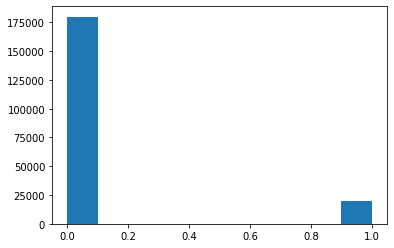

In [11]:
#plot a histogram to see the distribution of target class visualy
plt.hist(df_train['target'])

 
We can see here that the target class is imbalanced and the majority and minority class are having a ratio of 9:1

#### Data Cleaning

##### Missing Value Analysis

In [12]:
df_train[df_train.isnull().any(axis=1)]

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


In [13]:
df_test[df_test.isnull().any(axis=1)]

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


#### Outlier Analysis

###### Let's see the spread of data in train and test dataset with the help of a box plot

In [14]:
# putting all the df colname in a list
dfcols_train = list(df_train.columns)
dfcols_test = list(df_test.columns)
# exculdig target and index columns
variables_train = dfcols_train[1:]
variables_test = dfcols_test[0:]
# splitting the list every n elements:
n = 10
chunks_train = [variables_train[x:x + n] for x in range(0, len(variables_train), n)]
chunks_test =  [variables_test[x:x + n] for x in range(0, len(variables_test), n)]

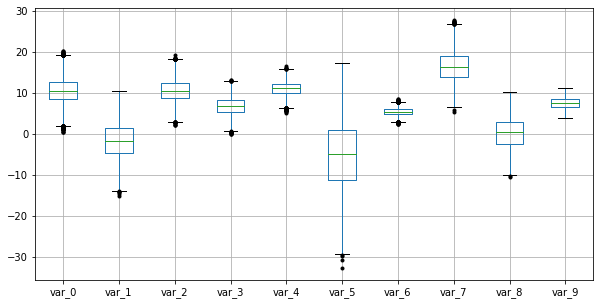

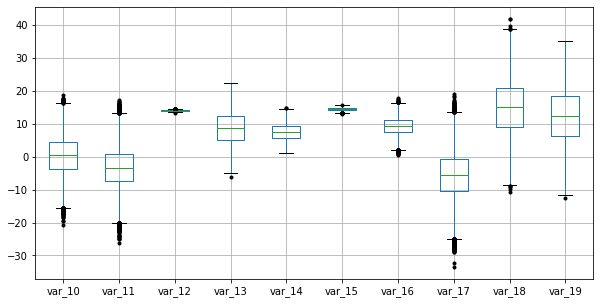

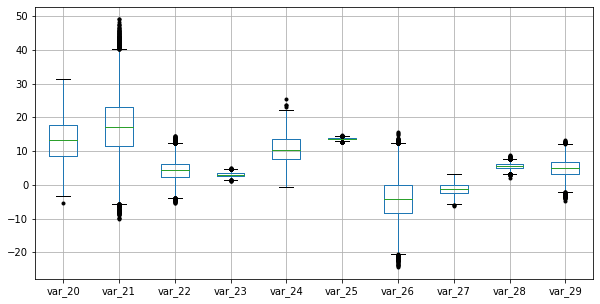

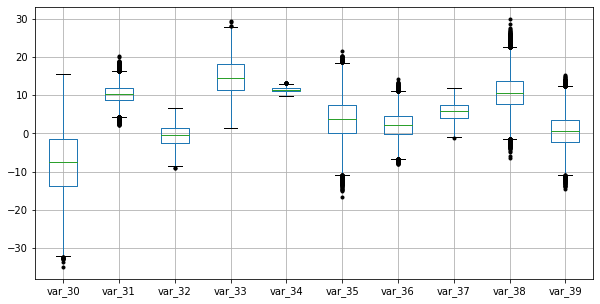

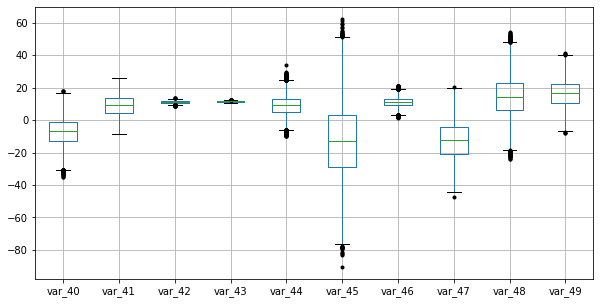

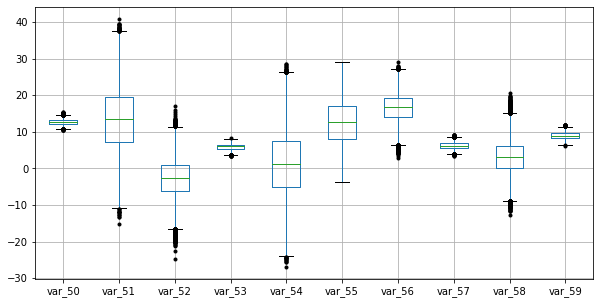

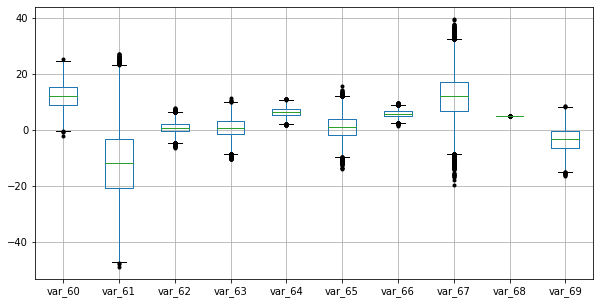

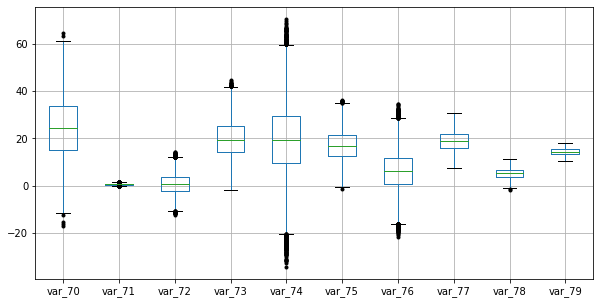

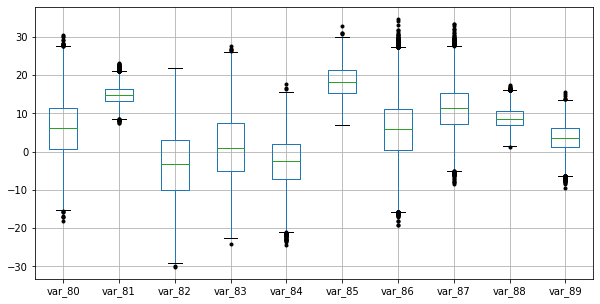

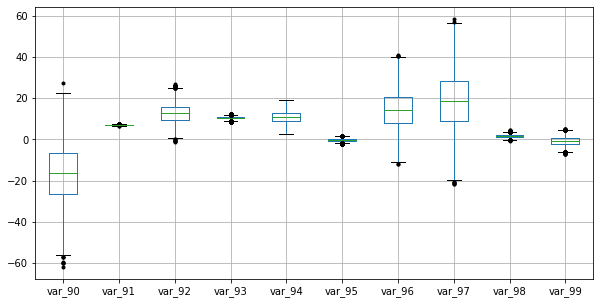

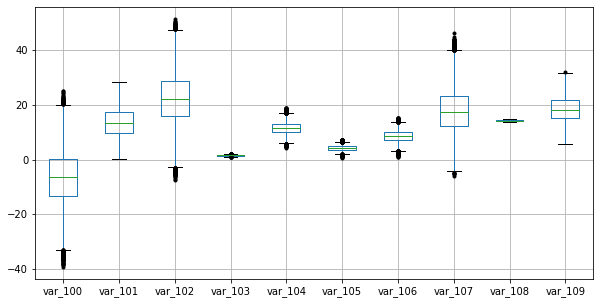

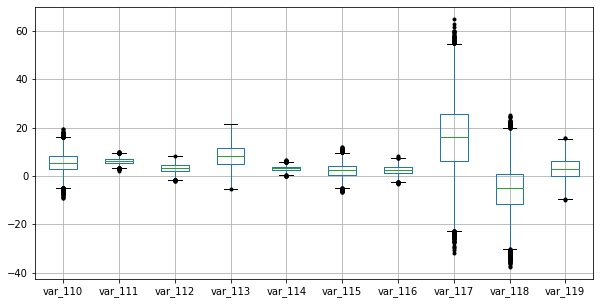

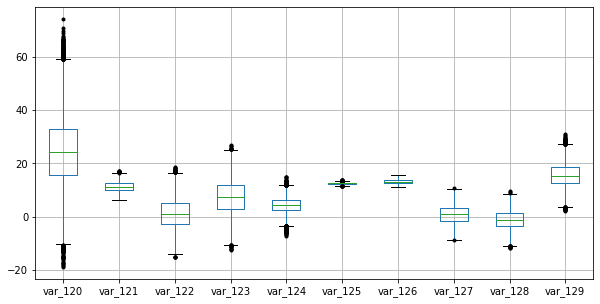

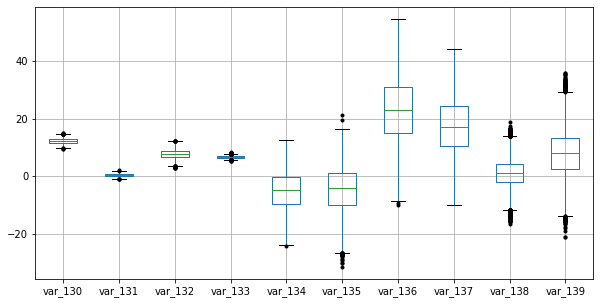

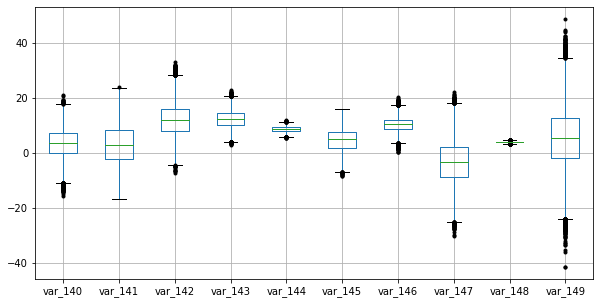

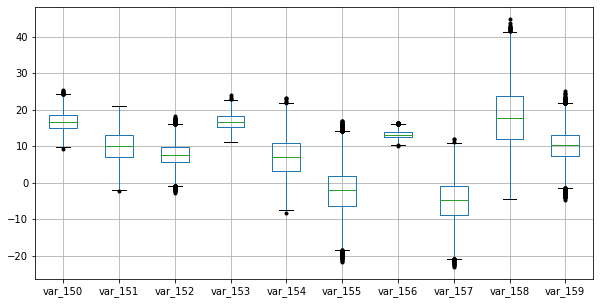

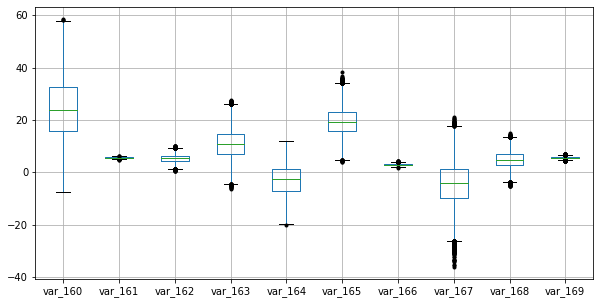

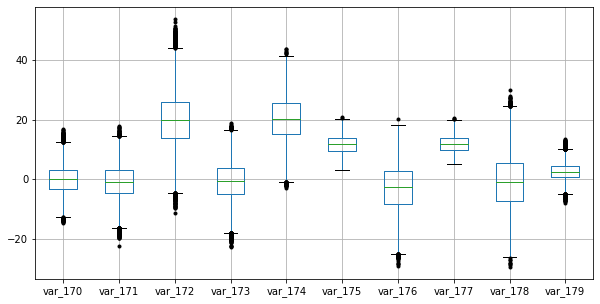

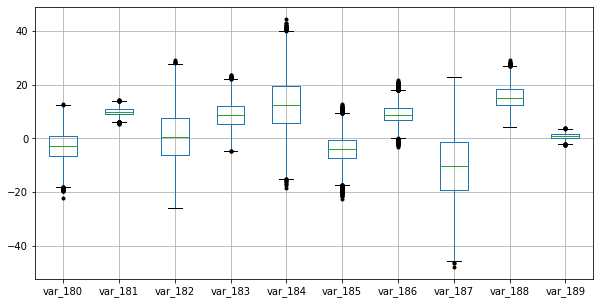

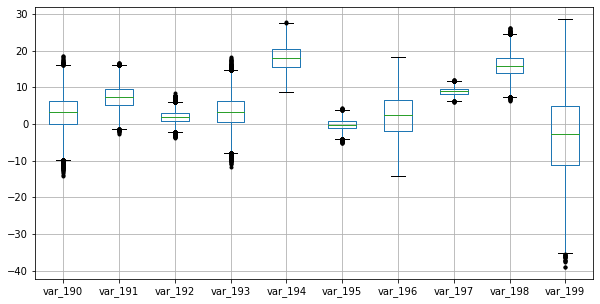

In [15]:
# displaying a boxplot of train dataset for every n columns:
for i in chunks_train:
    plt.show(df_train.boxplot(column = i, sym='k.', figsize=(10,5)))

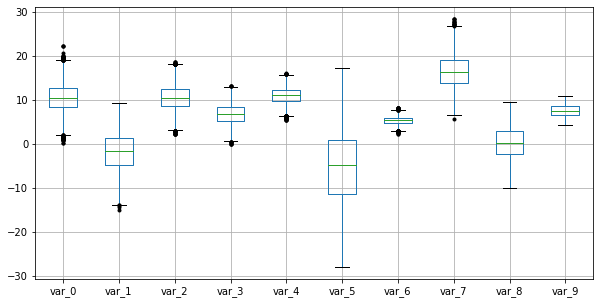

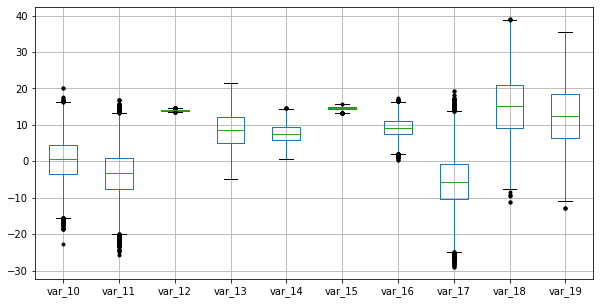

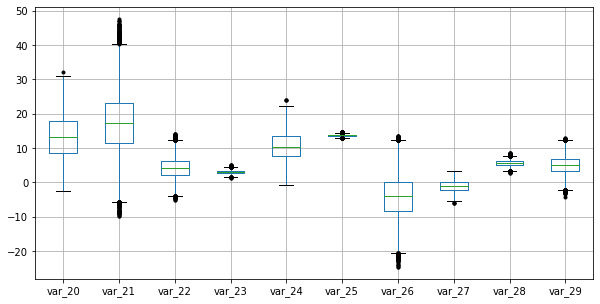

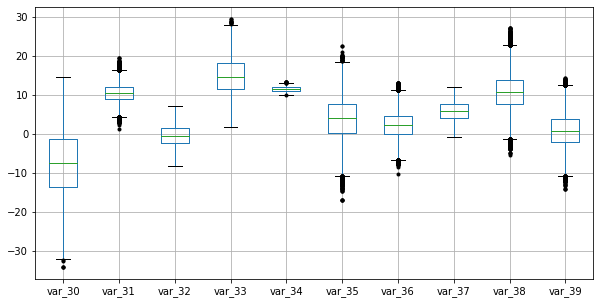

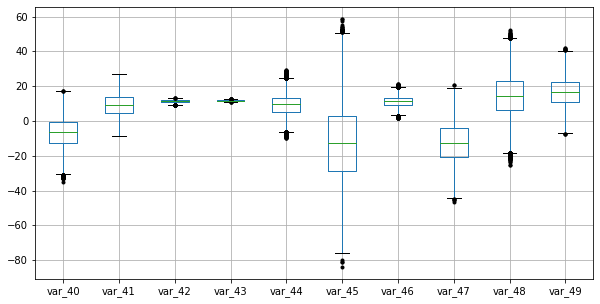

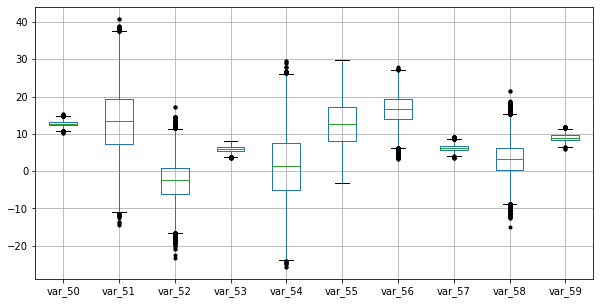

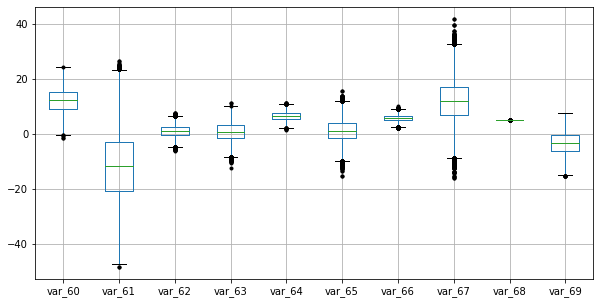

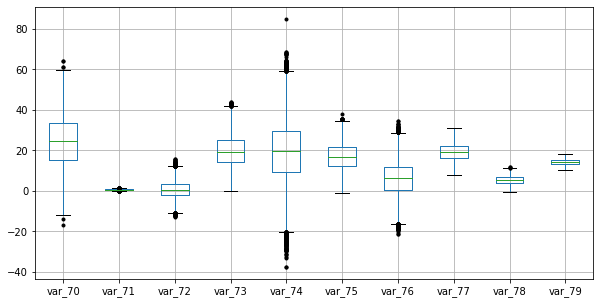

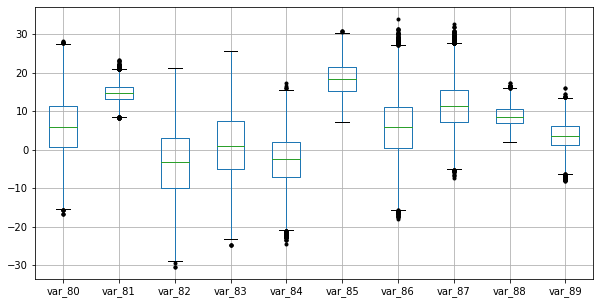

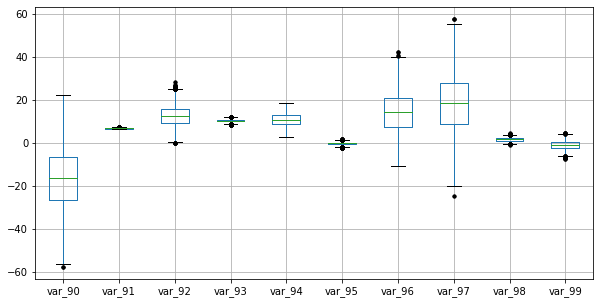

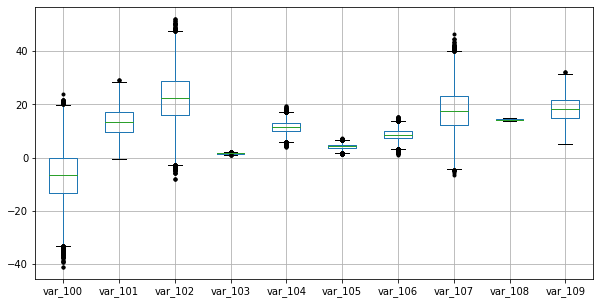

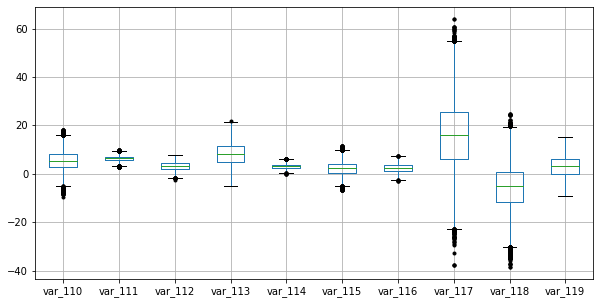

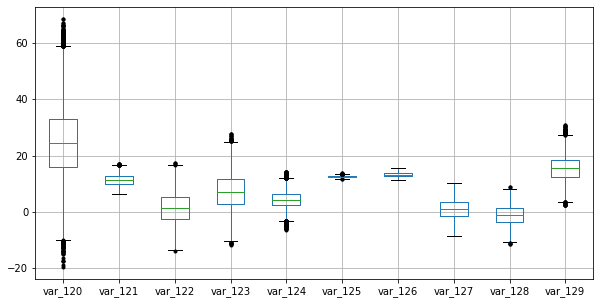

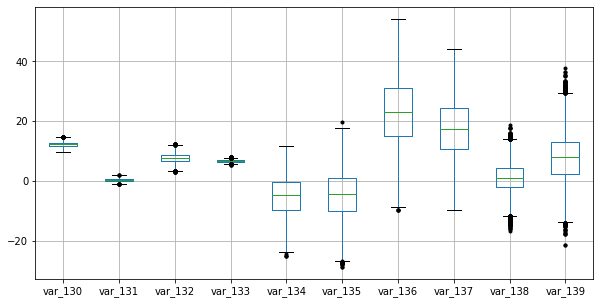

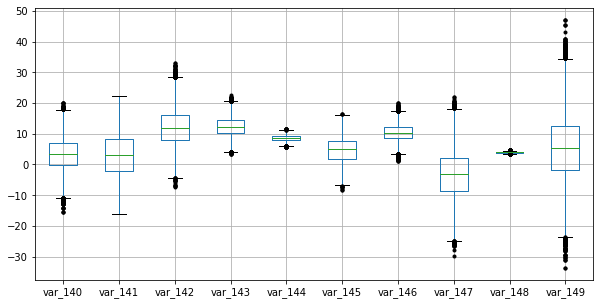

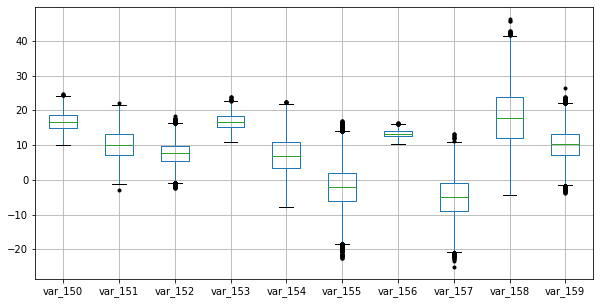

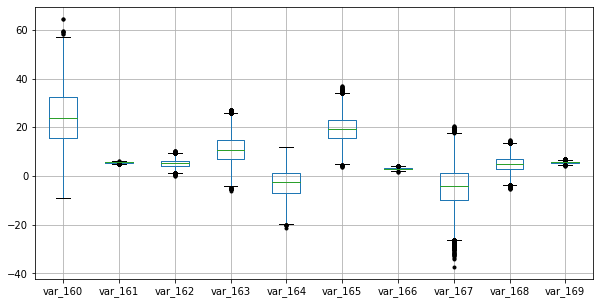

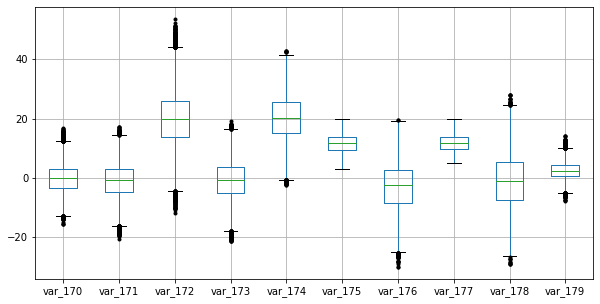

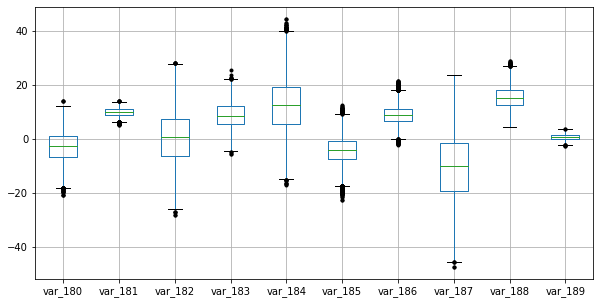

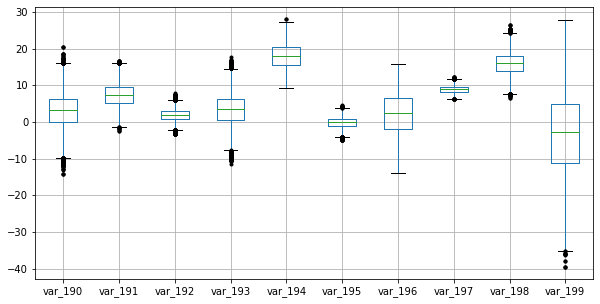

In [16]:
for i in chunks_test:
    plt.show(df_test.boxplot(column = i, sym='k.', figsize=(10,5)))



As shown in the box plot there are variables which contains some outlier data points, but as the spread of data points is not to large for most of the variables & also the dataset is imbalanced we would not be performing outlier removal operation as we might loose much observations having minority target class

## Feature Selection

###### First we create independent & dependent variable dataframes

In [17]:
X = df_train.drop(labels='target',axis =1)
y = df_train['target']
X.shape, y.shape

((200000, 200), (200000,))

###### Remove Constant Features by applying filter

In [18]:
const_filter_train = VarianceThreshold(threshold=0)
const_filter_train.fit(X)
const_filter_train.get_support().sum()

200

In [19]:
const_filter_test = VarianceThreshold(threshold = 0)
const_filter_test.fit(df_test)
const_filter_test.get_support().sum()

200


It can be seen that none of the 200 features in the training as well as test dataset were having constant values.

###### As we can see that there are no duplicated features present in the dataset

#### Check for correlation among variables

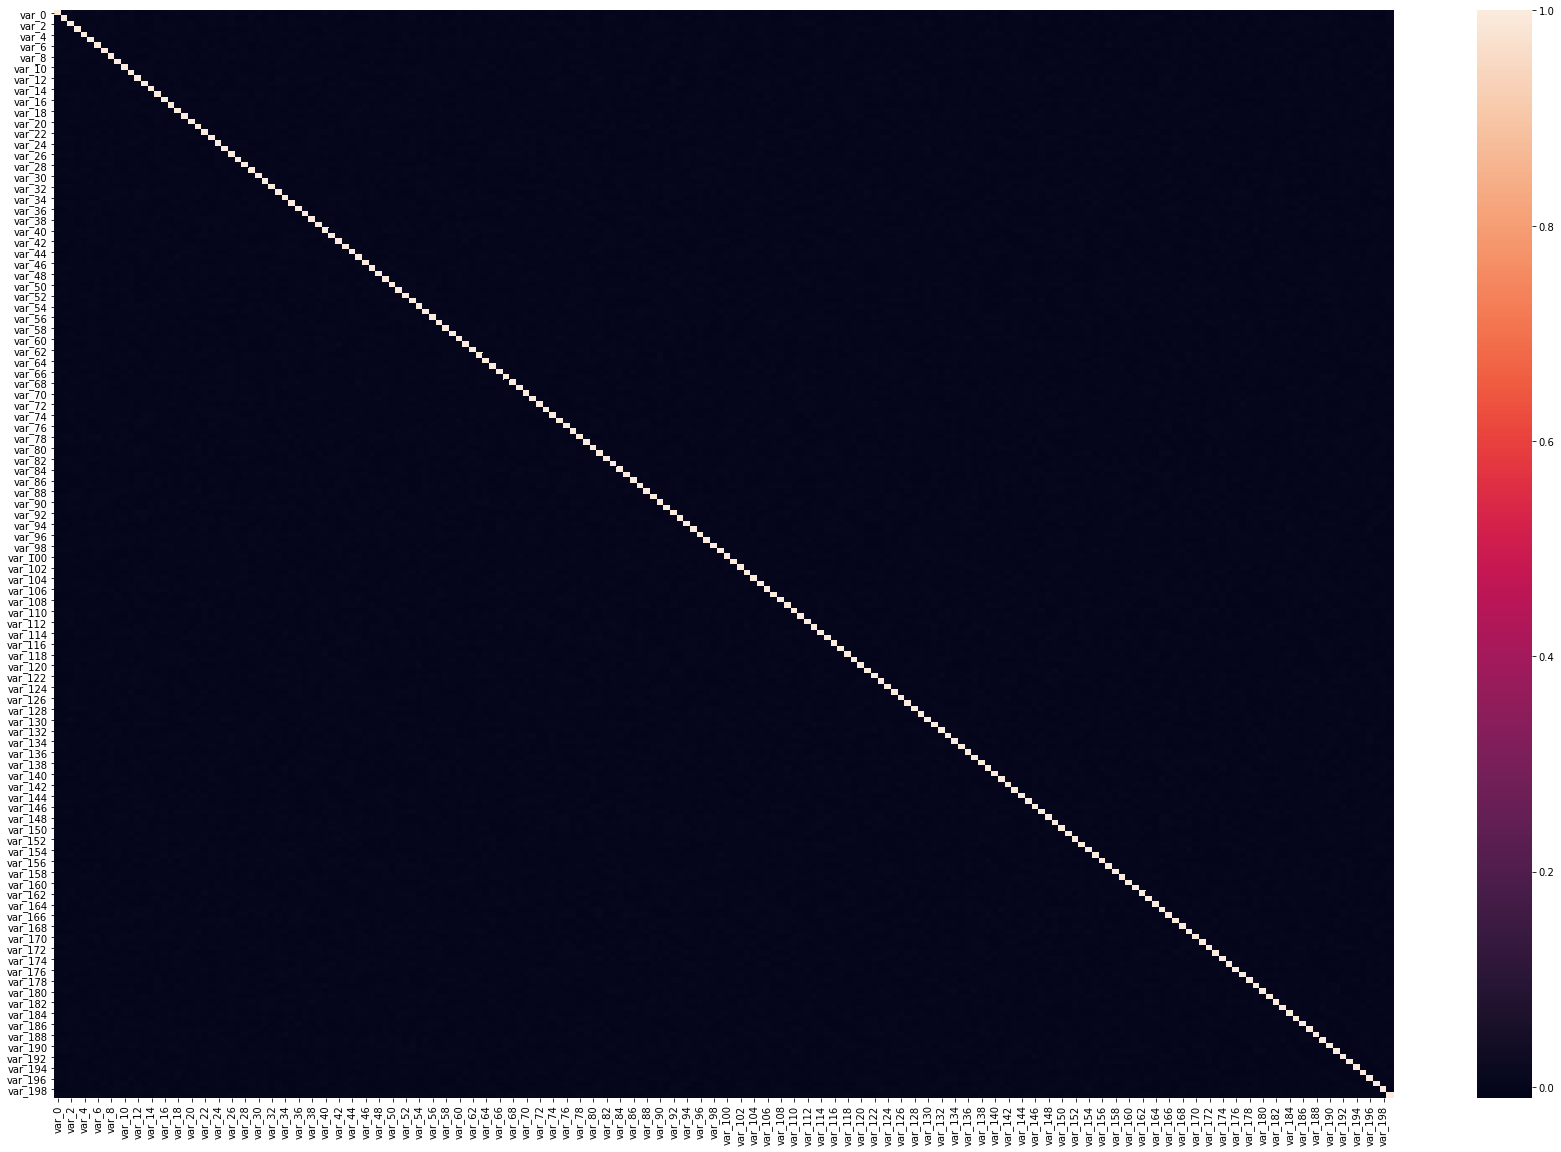

In [37]:
plt.figure(figsize=(30,20))
sns.heatmap(X.corr())

In [ ]:
sns.heatmap(df_test.corr())

 
As we can see from the plot that there are no significant correlation among any of the variables

#### Now Let's break our model into train and validation set 

In [20]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size = 0.2, random_state = 29)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((160000, 200), (40000, 200), (160000,), (40000,))

## Handling Imbalanced Target Class

#### Now as we can recall that the target class of our dataset was imbalanced 

In [21]:
y.value_counts()

0    179902
1     20098
Name: target, dtype: int64

#### let's see that what is the quantity of target class in train data

In [22]:
y_train.value_counts()

0    143936
1     16064
Name: target, dtype: int64


i.e. out of 1,60,000 observations in training set 1,43,936 belongs to majority class('0') & 16064 belongs to minority class('1')

######  -> As our result would definetly be biased towards the majority class we have to balance this target class by either oversampling the minority class or undersampling the majority class

######  -> Now as our dataset already having 2 lacs observation oversampling will make it approx double and it would not be possible for me to run the various model on such huge dataset on local machine

######  -> So i'm going with the undersampling method as we need to sample the dataset anyways due to the constraint of local machine

######  -> For this i'm going to use Random Under Sampler function which is available in imblearn.under_sampling module

In [23]:
UndSamp = RandomUnderSampler(sampling_strategy= 'auto',random_state=35)

Storing the resampled observations in X_train_res & y_train_res

In [24]:
X_train_res,y_train_res = UndSamp.fit_sample(X_train,y_train)

In [25]:
y_train_res.value_counts()

1    16064
0    16064
Name: target, dtype: int64

###### As it can be seen that our target class is balanced now and we will now have to work with only 32,128 observations

## Model Creation

#### Before we proceed with the model creation let's check the distribution of all the variable data points for both the target class and see how well they are differentiated

In [48]:
def plot_feature_distribution(target_class_1, target_class_2, label1, label2, features):
    i = 0
    sns.set_style('white')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(target_class_1[feature], hist=False,label=label1, color='red')
        sns.distplot(target_class_2[feature], hist=False,label=label2, color='green')
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show()

In [49]:
df_training_res = pd.concat(objs=(X_train_res,y_train_res),axis=1)
df_training_res.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,2.3151,-6.3547,10.2964,9.3723,11.8847,-6.3734,6.3038,19.5828,-0.3422,7.9165,...,5.3386,0.8351,8.0584,18.5000,-0.0185,4.3145,8.7855,12.1909,-7.7226,0
1,9.4064,1.7509,9.9486,8.3260,11.6375,-5.9614,4.3101,12.9874,2.5455,6.6493,...,10.2638,1.2445,1.9997,21.7495,-0.1786,-0.9514,7.8141,17.2131,-4.4189,0
2,14.5625,-5.0779,8.5380,8.2651,11.6993,-8.3256,4.1975,15.8125,-0.4599,9.3352,...,10.4370,1.7697,3.9235,17.6289,-3.3314,6.3555,8.5152,21.9899,-2.9116,0
3,12.6594,-7.9903,11.7314,7.7264,12.6712,-7.1654,5.6178,14.5052,1.5570,9.1077,...,7.6729,5.4276,5.2591,22.6886,1.0268,6.2408,9.1909,15.6269,-11.0748,0
4,15.4664,-4.3340,11.7161,11.3090,12.1440,0.2611,5.7897,20.9263,4.7910,5.7165,...,0.8320,4.5178,-2.6190,22.2724,0.0461,6.5224,7.8431,13.9874,2.7501,0


In [54]:
tar_c1 = df_training_res.loc[df_training_res['target']== 0]
tar_c2 = df_training_res.loc[df_training_res['target']== 1]
features_set1 = df_training_res.columns.values[0:100]

<Figure size 432x288 with 0 Axes>

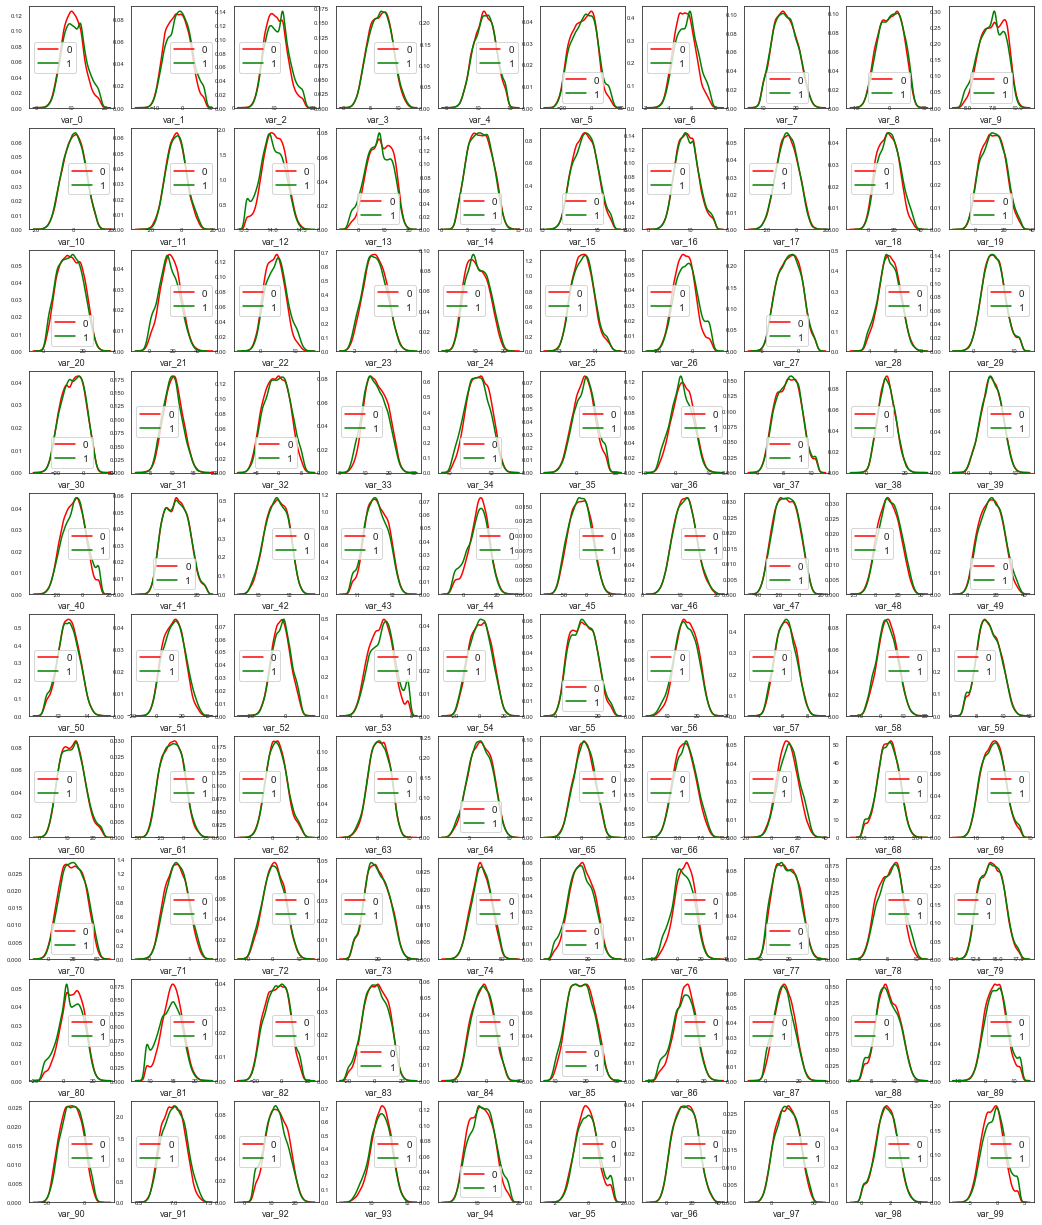

In [55]:
plot_feature_distribution(tar_c1,tar_c2,'0','1',features_set1)

In [59]:
features_set2 = df_training_res.columns.values[100:200]

<Figure size 432x288 with 0 Axes>

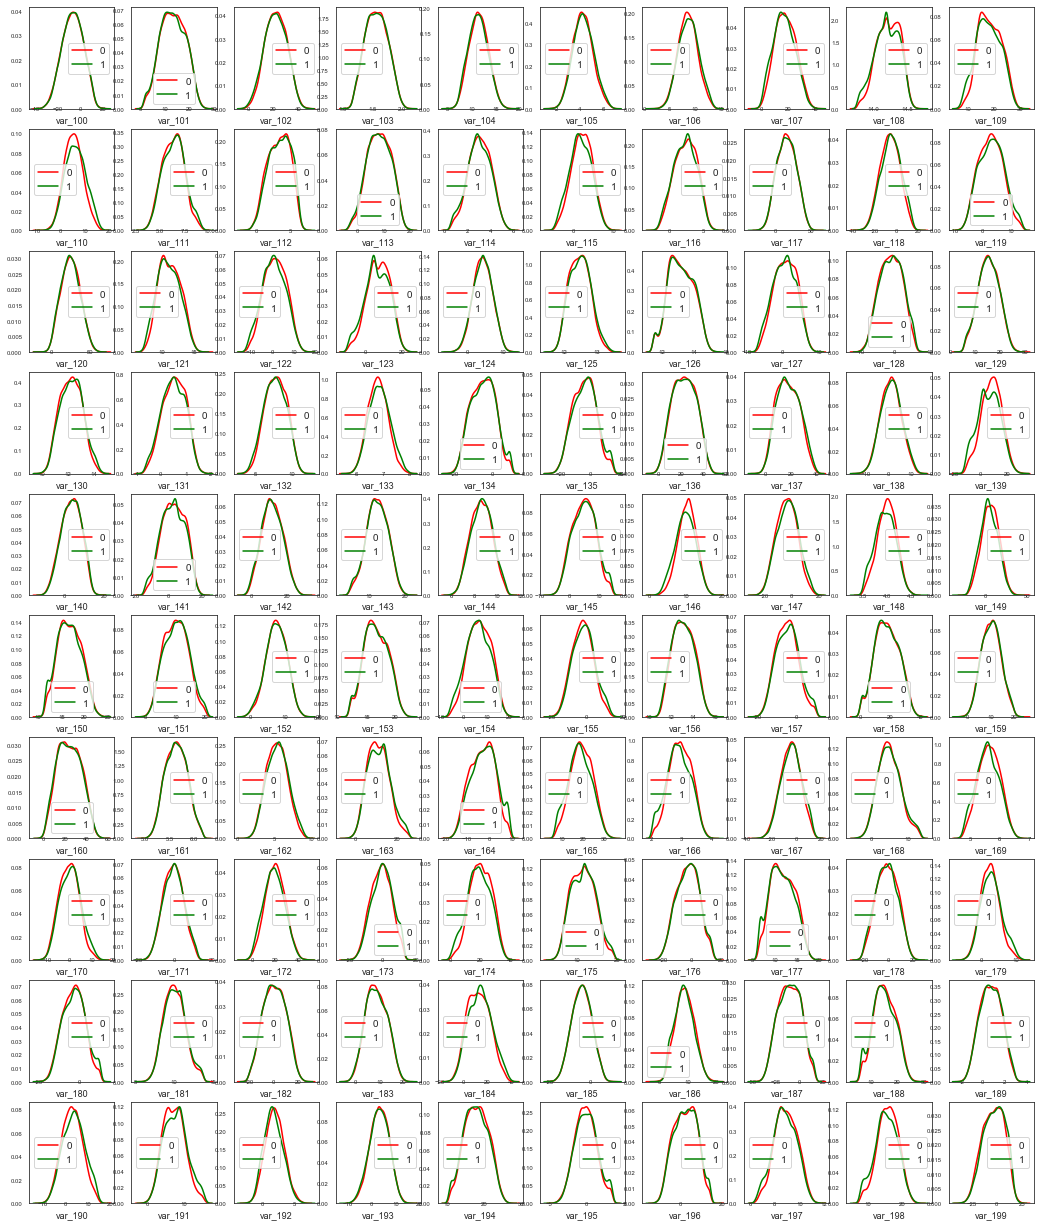

In [60]:
plot_feature_distribution(tar_c1,tar_c2,'0','1',features_set2)

###### As we can see that the normal distribution curve :
1. Some of the variables like var_02,var_06,var_09,var_12,var_13 etc. are having slightly different distribution for both minority and majority target class.
2. But the distribution for most of the variables are approximately similar for both the target classes so it will be hard to classify them using distance methods, So we can conclude here that tree based algorithms can work well for this dataset.
    

In [26]:
def performance_metrics(y_test,y_pred,Classifier_Name):
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    TPR = round(cm[1,1]/(cm[1,1]+cm[1,0])*100,2)
    TNR = round(cm[0,0]/(cm[0,0]+cm[0,1])*100,2)
    FPR = round(cm[0,1]/(cm[0,0]+cm[0,1])*100,2)
    FNR = round(cm[1,0]/(cm[1,0]+cm[1,1])*100,2)
    roc_auc = roc_auc_score(y_test,y_pred)
    fpr,tpr,threshold = roc_curve(y_test,y_pred)
    print( "Accuracy : ", accuracy)
    print("Confusion Matrix: ", cm)
    print("Precision: ",precision_score(y_test,y_pred))
    print("Recall: ", recall_score(y_test,y_pred))
    print("F1-Score: ", f1_score(y_test,y_pred))
    print("TPR or Sensitivity : ", TPR, "TNR or Specificity: ", TNR,"FPR: ",FPR, "FNR: ",FNR)
    print("ROC-AUC Score: ",roc_auc)
    plt.plot(fpr,tpr)
    plt.plot(tpr,tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(label="ROC_AUC Curve for " +str(Classifier_Name))
    plt.show()

### Logistic Regression

Let's go for the Logistic Regression Method First and see how it performs

In [88]:
clf_LR = LogisticRegression(C=0.01,random_state = 35,solver= 'lbfgs',max_iter=5000)
clf_LR.fit(X_train_res,y_train_res)
y_pred_LR = clf_LR.predict(X_val)

Accuracy :  0.739575
Confusion Matrix:  [[26662  9304]
 [ 1113  2921]]
Precision:  0.23893660531697342
Recall:  0.7240951908775409
F1-Score:  0.3593086905713759
TPR or Sensitivity :  72.41 TNR or Specificity:  74.13 FPR:  25.87 FNR:  27.59
ROC-AUC Score:  0.7327032146346778


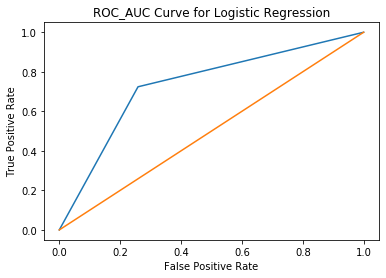

In [89]:
performance_metrics(y_val,y_pred_LR,"Logistic Regression")

###### As the Recall = 78% , FNR = 22.09% and Roc-auc_score = 77.81%

This model doesn't seems to perform very well as our main problem was to identify the customers who will perform the specific transaction, and here the FNR & Recall scores are not that great.

### Decision Tree Classifier

In [33]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train_res,y_train_res)
y_pred_DT = clf_DT.predict(X_val)

Accuracy :  0.59285
Confusion Matrix:  [[21384 14582]
 [ 1704  2330]]
Precision:  0.13777199621570482
Recall:  0.577590480912246
F1-Score:  0.2224768452210446
TPR or Sensitivity :  57.76 TNR or Specificity:  59.46 FPR:  40.54 FNR:  42.24
ROC-AUC Score:  0.5860760056232251


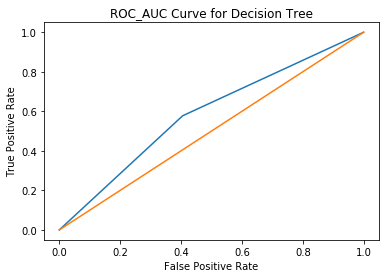

In [34]:
performance_metrics(y_val,y_pred_DT,"Decision Tree")

### Random Forest Classifier

In [49]:
clf_RF = RandomForestClassifier(n_estimators=2000)
clf_RF.fit(X_train_res,y_train_res)
y_pred_RF = clf_RF.predict(X_val)

Accuracy :  0.743325
Confusion Matrix:  [[26493  9473]
 [  794  3240]]
Precision:  0.254857232753874
Recall:  0.8031730292513634
F1-Score:  0.3869349734280767
TPR or Sensitivity :  80.32 TNR or Specificity:  73.66 FPR:  26.34 FNR:  19.68
ROC-AUC Score:  0.7698926926827356


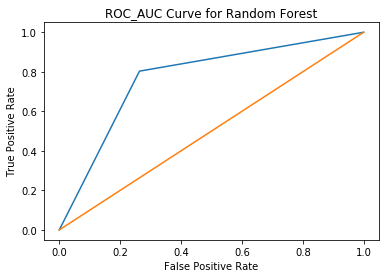

In [50]:
performance_metrics(y_val,y_pred_RF,"Random Forest")

### Naive Bayes Algorithm

In [114]:
clf_NB = GaussianNB()
clf_NB.fit(X_train_res,y_train_res) 
y_pred_NB = clf_NB.predict(X_val)

Accuracy :  0.771525
Confusion Matrix:  [[27824  8142]
 [  997  3037]]
Precision:  0.27167009571518025
Recall:  0.7528507684680218
F1-Score:  0.39926378755012165
TPR or Sensitivity :  75.29 TNR or Specificity:  77.36 FPR:  22.64 FNR:  24.71
ROC-AUC Score:  0.7632351490118566


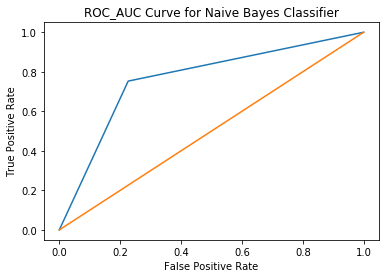

In [87]:
performance_metrics(y_val,y_pred_NB,"Naive Bayes Classifier")

#### Let's apply K-fold cross validation on Naive Bayes' Algorithm

In [37]:
acc_10_cv_NB = cross_val_score(clf_NB,X_train_res,y_train_res,cv=10)
acc_10_cv_NB

array([0.80672269, 0.79925303, 0.79147214, 0.81668223, 0.81263617,
       0.7989418 , 0.81356987, 0.80578898, 0.81787049, 0.79856787])

In [94]:
avg_acuracy_NB = np.mean(acc_10_cv_NB)*100
avg_acuracy_NB

80.61505271819534

### Model Selection:

###### By comparing Various models performance Metrics we can be certain that the Naive Bayes Classifier has performed better than all the other models on the validation set of our train dataset as it provides highest roc-auc score, highest Recall, lowest FNR & highiest accuracy.

### Predicting the classes for the test dataset given using Naive bayes classifier:

In [115]:
y_pred = clf_NB.predict(df_test)

###### Storing the predicted target class in a new column of the test dataset

In [116]:
df_test['predicted target class'] = y_pred
df_test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,predicted target class
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,1
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,1
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,1
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,1
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,0


###### Storing the test file with the predicted target class at the working directory location by name "Submission" in csv format

In [122]:
df_test.to_csv(path_or_buf= "C://Users/acer/Desktop/edWisor Project1/Submission.csv")